Data Mining [H02C6a] - Spring 2022

# Bike Rental Usage Prediction

In this exercise, we will use various supervised learning techniques to predict the usage of the bike sharing system.

In [2]:
import pandas as pd

# To suppress scikit-learn warnings
import warnings
warnings.filterwarnings('ignore')

# For plotting
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

## Load the data

The bike dataset is devided into training and test sets. The former is used to learn the model, whereas the latter is left for evaluation.

In [3]:
train_data = pd.read_csv('../datasets/bikes_train.csv', parse_dates=['datetime'])
test_data = pd.read_csv('../datasets/bikes_test.csv', parse_dates=['datetime'])
test_count = pd.read_csv('../datasets/bikes_test_solution.csv', parse_dates=['datetime'])
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,0.24,0.2879,0.75,0.0,0,1,1


##  Preprocess the data

<AxesSubplot:xlabel='datetime'>

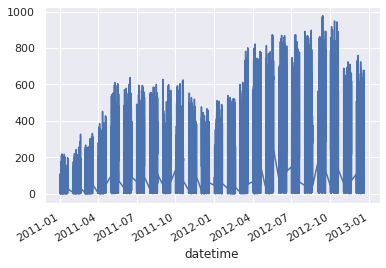

In [4]:
# Set dataframe index on the datetime object.
# This facilitates time-based plotting and accessing the data based on time.
train_data_time_idx = train_data.set_index('datetime')
test_data_time_idx = test_data.set_index('datetime')
train_data_time_idx['count'].plot()

# Part 1: Classification

Let us call the usage of the system <i>high</i> if it is higher than the median usage at that time (computed over the whole dataset).

Introduce a new binary variable `is_high` indicating whether the current usage of the system is high. 

<b>Note: Keep in mind that, as we already discussed during the first exercise session, the overall system usage is higher in 2012 compared to that in 2011 (this can be seen from the plot above).</b>

In [8]:
# Your code here
train_is_high = train_data['count'] > train_data['count'].median()
test_is_high = test_count['count'] > test_count['count'].median()

For this prediction task, think about which features the model should take advantage of. You can either select and keep those features, or drop the others. To use only part of the data, look at methods like <a href = 'https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html'>`pd.DataFrame.iloc`</a> or <a href = 'https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html'>`pd.DataFrame.drop`</a>.

In [20]:
# Your code here
print("Train:\n")
print(train_data.head())
print("\nTest:\n")
print(test_data.head())
useful_train_data = train_data.drop(['datetime', 'casual', 'registered', 'count'], axis=1)
useful_test_data = test_data.drop(['datetime'], axis=1)

Train:

             datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  0.24  0.2879   
1 2011-01-01 01:00:00       1        0           0        1  0.22  0.2727   
2 2011-01-01 02:00:00       1        0           0        1  0.22  0.2727   
3 2011-01-01 03:00:00       1        0           0        1  0.24  0.2879   
4 2011-01-01 04:00:00       1        0           0        1  0.24  0.2879   

   humidity  windspeed  casual  registered  count  
0      0.81        0.0       3          13     16  
1      0.80        0.0       8          32     40  
2      0.80        0.0       5          27     32  
3      0.75        0.0       3          10     13  
4      0.75        0.0       0           1      1  

Test:

             datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-20 00:00:00       1        0           1        1  0.26  0.2273   
1 2011-01-20 01:00:00       1        0           1     

## Logistic Regression

Train a simple logistic regression model to predict whether the usage of the system is high for the records in the test set.

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [25]:
# Your code here
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(useful_train_data, train_is_high)

clf.predict(useful_test_data)
#print(clf.predict(useful_test_data).tolist())

clf.score(useful_test_data, test_is_high)

0.7417218543046358

## Decision Tree Classifier

Build a decision tree model to predict whether the usage of the system is high for the records in the test set.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [26]:
# Your code here
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(useful_train_data, train_is_high)
clf.score(useful_test_data, test_is_high)

0.6577853072539658

Feel free to try out other classification techniques as well.

In [27]:
# Your code here
from sklearn.svm import SVC
clf = SVC()
clf.fit(useful_train_data, train_is_high)
clf.score(useful_test_data, test_is_high)

0.7501925150161712

# Part 2: Regression

Let's now predict the raw counts of the bikes in use.

## Linear Regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [28]:
# Your code here
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(useful_train_data, train_data['count'])
clf.score(useful_test_data, test_count['count'])

0.015555213306637918

## Regression Tree 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [29]:
# Your code here
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(useful_train_data, train_data['count'])
clf.score(useful_test_data, test_count['count'])

0.0050823964269213

Feel free to try out other classification techniques as well.

In [30]:
# Your code here
from sklearn.svm import SVC
clf = SVC()
clf.fit(useful_train_data, train_data['count'])
clf.score(useful_test_data, test_count['count'])

0.01848144155244109